ic| rgb_hw3.shape: (1095, 1600, 3)
ic| image.size: (1600, 1095)


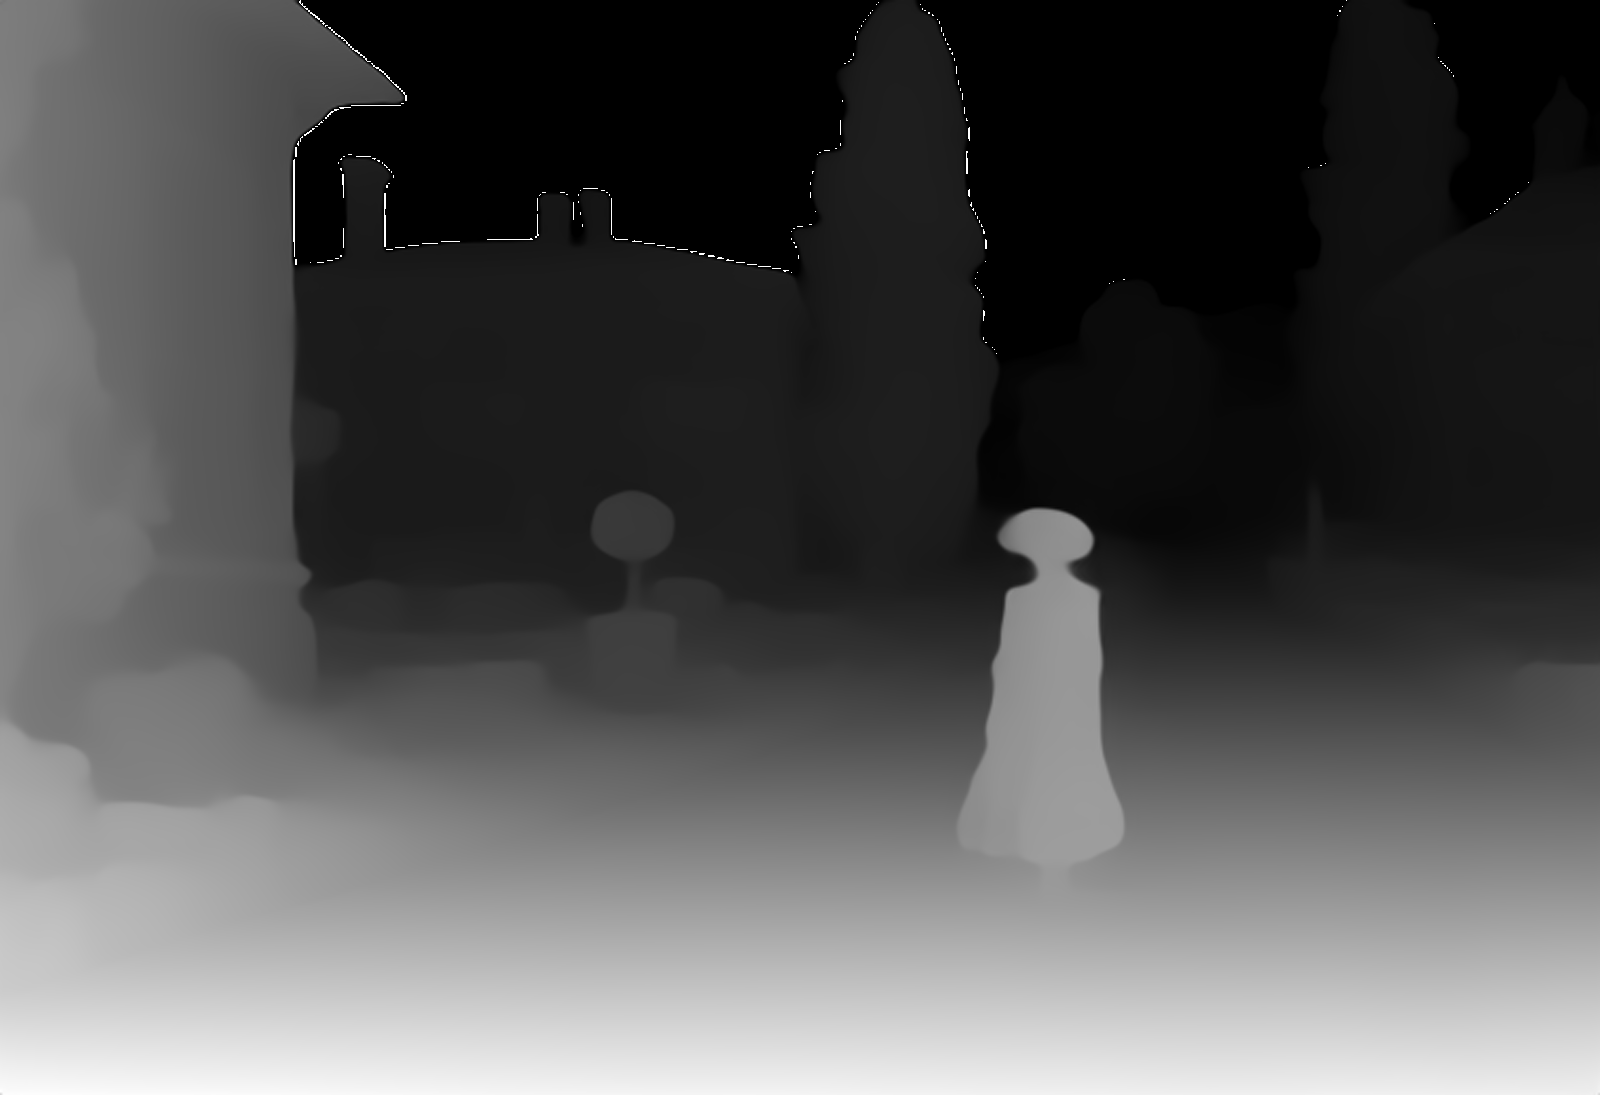

In [35]:
from transformers import pipeline
from PIL import Image
import requests
import torch
import cv2
from einops import rearrange
from icecream import ic

# load pipe
pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf", device="cuda")

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image: Image.Image = Image.open(requests.get(url, stream=True).raw)
# image = Image.open("/home/pablo/0Dev/personal/mini-monoprior/examples/00021-275517064.jpeg")
bgr_hw3 = cv2.imread("/home/pablo/0Dev/personal/mini-monoprior/examples/2024-06-13_23-50-20_4308.jpeg")
rgb_hw3 = cv2.cvtColor(bgr_hw3, cv2.COLOR_BGR2RGB)
h, w, _ = rgb_hw3.shape
image = Image.fromarray(rgb_hw3)

ic(rgb_hw3.shape)
ic(image.size)

# inference
depth_dict = pipe(image)
depth_dict['depth']

In [36]:
for k, v in depth_dict.items():
    ic(k, type(v))
    if isinstance(v, torch.Tensor):
        ic(v.shape, v.dtype)

ic| k: 'predicted_depth', type(v): <class 'torch.Tensor'>
ic| v.shape: torch.Size([1, 518, 756]), v.dtype: torch.float32
ic| k: 'depth', type(v): <class 'PIL.Image.Image'>


In [37]:
depth_dict["predicted_depth"]

tensor([[[11.3571, 11.0444, 11.0963,  ...,  0.0000,  0.0000,  0.0000],
         [10.8620, 11.1525, 11.3312,  ...,  0.0000,  0.0000,  0.0000],
         [11.3068, 11.3678, 11.4253,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [23.1219, 22.9520, 22.9193,  ..., 21.7311, 21.7757, 21.9638],
         [23.0399, 22.9745, 22.9749,  ..., 21.7186, 21.9625, 22.1181],
         [20.1419, 22.7751, 23.1304,  ..., 21.6195, 22.1459, 20.3158]]])

In [39]:
pred_depth_bchw = torch.nn.functional.interpolate(
            rearrange(depth_dict["predicted_depth"], "1 h w -> 1 1 h w"), (h, w), mode="bilinear"
        )

ic(pred_depth_bchw.shape)

ic| pred_depth_bchw.shape: torch.Size([1, 1, 1095, 1600])


torch.Size([1, 1, 1095, 1600])